In [26]:
import os
import json
import socket

import pandas as pd
import numpy as np
from array import *
import csv
import random
from tqdm import tqdm

# using datetime module
import datetime;

# Binary Search
from bisect import bisect_left
from bisect import bisect_right

import matplotlib.pyplot as plt

import multiprocessing as mp
from multiprocessing import Process, Queue
import queue
import threading

import networkx as nx

#https://python-louvain.readthedocs.io/en/latest/api.html
#community.modularity(partition, graph, weight='weight')
from community import modularity


import powerlaw

print('----------------------')
#unique_addresses_len = len(unique_addresses)
unique_addresses_len = 40324960
print('unique_addresses_len = ', unique_addresses_len)

print('----------------------')
print('done!')


----------------------
unique_addresses_len =  40324960
----------------------
done!


In [3]:
print('----------------------')

#print(os.path.basename("/path/to/some/file.txt"))
#print(os.path.dirname("/path/to/some/file.txt"))

#BASE_ADDRESS = '/local/scratch/exported/parsed_blockchains/cardano_mostafa/'
BASE_ADDRESS = '/local/scratch/exported/blockchain_parsed/cardano_mostafa/'
TEMP_ADDRESS = BASE_ADDRESS + '/temp_files/'


print('----------------------')
print('done!')


----------------------
----------------------
done!


In [4]:

##########################################################################################
def BinarySearch(a, x):
    i = bisect_left(a, x)
    if i < len(a) and a[i] == x:
        return i
    else:
        print('BinarySearch Error: -1')
        return -1

##########################################################################################
def BinarySearch_Find_start_end(a, x):
    i = bisect_left(a, x)
    j = bisect_right(a, x) - 1
    if i < len(a) and a[i] == x and j < len(a) and a[j] == x:
        return [i, j]
    else:
        print('BinarySearch Error: -1')
        print('i = ', i)
        print('j = ', j)
        return -1

##########################################################################################
def store_array_to_file (input_array_name, file_name, index_=False, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Array to ' + file_name + '): ', ct)

    df = pd.DataFrame(input_array_name)
    df.to_csv(file_name, index=index_, header=header_)

    '''
    with open(file_name, 'w') as filehandle:
        for element in input_array_name:
            filehandle.write(f'{element}\n')
    '''

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Array to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_array (file_name, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Array): ', ct)

    df = pd.read_csv(file_name, header=header_)
    output_array_name = df.to_numpy()
    
    '''
    output_array_name = []
    with open(file_name, 'r') as filehandle:
        for line in filehandle:
            # Remove linebreak which is the last character of the string
            curr_place = line[:-1]
            # Add item to the list
            output_array_name.append(curr_place)
    '''    

    '''
    for index, row in df.iterrows():
        new_line = df.loc[index , 0]
        output_array_name.append(new_line)
        if (index%1000000 == 0):
                print('One New Milion Records loaded: ', index)
    '''

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Array): ', et)
    
    return output_array_name

##########################################################################################
def store_dict_to_file_INT (input_dict_name, file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Dictionary to ' + file_name + '): ', ct)

    filehandle = csv.writer(open(file_name, 'w'))
    for key, val in input_dict_name.items():
        filehandle.writerow([key, val])

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Dictionary to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_dict_INT (file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Dictionary): ', ct)

    filehandle = csv.reader(open(file_name, 'r'))
    output_dict_name = {int(rows[0]):int(rows[1]) for rows in filehandle}

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Dictionary): ', et)
    
    return output_dict_name

##########################################################################################
def BinarySearch_Find_start_end(a, x):
    i = bisect_left(a, x)
    j = bisect_right(a, x) - 1
    if i < len(a) and a[i] == x and j < len(a) and a[j] == x:
        return [i, j]
    else:
        print('BinarySearch Error: -1')
        print('i = ', i)
        print('j = ', j)
        return -1

##########################################################################################
# Get weight of an edge:
def get_weight_of_edge(graph, node_1, node_2):
    EdgeWeight = graph.get_edge_data(node_1, node_2)['weight']
    #print('Weight of Edge (' + str(node_1) + ', ' + str(node_2) + ') = ', EdgeWeight)
    return EdgeWeight

##########################################################################################
# Get degree of a node:
def get_degree_of_node(graph, node_name, isWeighted=False):
    NodeDegree_Weighted = graph.degree(weight='weight')[node_name]
    NodeDegree_NoWeight = graph.degree[node_name]
    #print('Weighted Degree (' + str(node_name) + ') = ', NodeDegree_Weighted)
    #print('NoWeight Degree (' + str(node_name) + ') = ', NodeDegree_NoWeight)
    if (isWeighted == True):
        return NodeDegree_Weighted
    else:
        return NodeDegree_NoWeight

##########################################################################################
'''
def merge_two_nodes(graph, node_1, node_2):
    if (node_1 not in graph.neighbors(node_2)):
        print('Error: merging two non-neighboring nodes!')
        return
    
    supernode_name = str(node_1) + '|' + str(node_2)
    graph.add_node(supernode_name)
    
    supernode_neighbors = set(graph.neighbors(node_1)).union(set(graph.neighbors(node_2)))
    supernode_neighbors.remove(node_1)
    supernode_neighbors.remove(node_2)
    
    weights_LIST = []
    
    for neighbor in tqdm(supernode_neighbors, position=0, leave=True):
        edge_weight = 0
        if (neighbor in graph.neighbors(node_1)):
            edge_weight = edge_weight + get_weight_of_edge(graph, node_1, neighbor)
        if (neighbor in graph.neighbors(node_2)):
            edge_weight = edge_weight + get_weight_of_edge(graph, node_2, neighbor)
        if (edge_weight == 0):
            print('Error: supernode_neighbor is NOT neighbor of node_1 nor node_2!')
            return
        weights_LIST.append((supernode_name, neighbor, edge_weight))
        
    graph.add_weighted_edges_from(weights_LIST)
    graph.remove_node(node_1)
    graph.remove_node(node_2)
'''

'''
import collections
import functools
import operator


def merge_two_nodes(graph, node_1, node_2):
    if (node_1 not in graph.neighbors(node_2)):
        print('Error: merging two non-neighboring nodes!')
        return
    
    supernode_name = str(node_1) + '|' + str(node_2)
    graph.add_node(supernode_name)
    
    
    #supernode_neighbors = set(graph.neighbors(node_1)).union(set(graph.neighbors(node_2)))
    #supernode_neighbors.remove(node_1)
    #supernode_neighbors.remove(node_2)
    #weights_LIST = []
    #for neighbor in tqdm(supernode_neighbors, position=0, leave=True):
    #    edge_weight = 0
    #    if (neighbor in graph.neighbors(node_1)):
    #        edge_weight = edge_weight + get_weight_of_edge(graph, node_1, neighbor)
    #    if (neighbor in graph.neighbors(node_2)):
    #        edge_weight = edge_weight + get_weight_of_edge(graph, node_2, neighbor)
    #    if (edge_weight == 0):
    #        print('Error: supernode_neighbor does NOT have a common neighbor with node_1 nor node_2!')
    #        return
    #    weights_LIST.append((supernode_name, neighbor, edge_weight))
    #
    #graph.add_weighted_edges_from(weights_LIST)


    weights_LIST = []
    weights_LIST.append({(supernode_name,n2):data['weight'] for n1,n2,data in graph.edges(node_1, data=True)})
    weights_LIST.append({(supernode_name,n2):data['weight'] for n1,n2,data in graph.edges(node_2, data=True)})
    weights_DICT = dict(functools.reduce(operator.add, map(collections.Counter, weights_LIST)))
    weights_LIST = [(e[0],e[1],w) for e,w in weights_DICT.items()]
    graph.add_weighted_edges_from(weights_LIST)
        

    graph.remove_node(node_1)
    graph.remove_node(node_2)
'''





##########################################################################################
print('----------------------')
print('done!')



----------------------
done!


In [ ]:
# Store/Load graph object "Graph G Addrs network" to/from file:


# Store graph object to file:
'''
print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


import pickle
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
output_filename = BASE_ADDRESS + '/Graph_G_AddrsNetwork_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
pickle.dump(G, open(output_filename, 'wb'))


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Store G into file): ", et)

##########################################################################################
print('----------------------')
print('done!')
'''



# Load graph object from file:
'''
print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


import pickle
input_filename = BASE_ADDRESS + '/Graph_G_AddrsNetwork_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_000507.pickle'
print('input_filename = ', input_filename)
G = pickle.load(open(input_filename, 'rb'))


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Load G from file): ", et)

##########################################################################################
print('----------------------')
print('done!')
'''


In [ ]:
# Store/Load graph object "largest_cc_subgraph" to/from file:



# Store graph object to file:
'''
print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)

import pickle
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
output_filename = BASE_ADDRESS + '/Largest3_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
pickle.dump(largest_cc_subgraph, open(output_filename, 'wb'))

##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')
'''




# Load graph object from file:

print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)

import pickle
# '/Largest1_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_140703.pickle'
# '/Largest2_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_080139.pickle'
# '/Largest3_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_083614.pickle'
# '/Largest4_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085210.pickle'
# '/Largest5_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085920.pickle'
# '/Largest6_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
# '/Largest7_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
# '/Largest8_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
# '/Largest9_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
input_filename = BASE_ADDRESS + '/Largest1_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_140703.pickle'
largest_cc_subgraph = pickle.load(open(input_filename, 'rb'))

##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')





In [ ]:
# Read ("sorted" "unique" array_list) [= unique_addresses] from file:

print('----------------------')

file_name = BASE_ADDRESS + '/UniqueAddressesList__Cardano_TXs_All__2023-02-25_165101.txt'
unique_addresses = load_file_to_array (file_name)

print('Length of \"unique_addresses\" = ' + str(len(unique_addresses)))

##########################################################################################
print('----------------------')
print('done!')



In [ ]:
# Analyze characteristics of "largest_cc_subgraph" (1-nodes and degrees):


def print_edgesWeights_of_a_node (source_node):
    neighbors_test = nx.neighbors(largest_cc_subgraph, source_node)
    edges_weights_list = []
    
    for neighbor in neighbors_test:
        edges_weights_list.append((source_node, neighbor, largest_cc_subgraph.get_edge_data(source_node, neighbor)['weight']))

    edges_weights_list.sort(key=lambda a: a[2], reverse=True)
    
    for i in range(len(edges_weights_list)):
        print('\t Weight(' + str(edges_weights_list[i][0]).ljust(10) + ', ' + str(edges_weights_list[i][1]).rjust(10) + ') = ' + str(edges_weights_list[i][2]).rjust(10))





print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


print('----------------------')
print('Is Connected    (largest_cc_subgraph) = ', nx.is_connected(largest_cc_subgraph))
print('Number of Nodes (largest_cc_subgraph) = ', largest_cc_subgraph.number_of_nodes())
print('Number of Edges (largest_cc_subgraph) = ', largest_cc_subgraph.number_of_edges())

print('----------------------')
# Find weighted degrees of nodes:
degree_sequence = sorted((d for n, d in largest_cc_subgraph.degree(weight='weight')), reverse=False)
print('Sum Weighted Degrees (largest_cc_subgraph) = ', sum(degree_sequence))
print('Max Weighted Degrees (largest_cc_subgraph) = ', max(degree_sequence))

print('----------------------')
for i in range(1, 10):
    x = BinarySearch_Find_start_end(degree_sequence, i)
    print('Number of nodes with Weighted Degree \"' + str(i).ljust(2) + '\" = ' + str(x[1] - x[0] + 1).rjust(10))

print('----------------------')
degree_sequence_LIST_sorted = sorted(largest_cc_subgraph.degree(weight='weight'), key= lambda x: x[1], reverse=True)
indx=0
for i in range(0, 100):
    node_name            = degree_sequence_LIST_sorted[i][0]
    node_degree_Weighted = largest_cc_subgraph.degree(weight='weight')[node_name]
    node_degree_NoWeight = largest_cc_subgraph.degree[node_name]
    payment_cred         = unique_addresses[node_name]
    
    indx = indx + 1
    print((str(indx)+'.').ljust(5) + 'Highest Weighted Degree [' + str(i).rjust(3) + '] --> NodeName: ' + str(node_name).ljust(10) + ' | NodeDegreeWeighted: ' + str(node_degree_Weighted).rjust(10) + ' | NodeDegreeNoWeight: ' + str(node_degree_NoWeight).rjust(10) + ' | payment_cred: ', payment_cred)
    if (node_degree_NoWeight < 10):
        #indx = indx + 1
        #print((str(indx)+'.').ljust(5) + 'Highest Weighted Degree [' + str(i).rjust(3) + '] --> NodeName: ' + str(node_name).ljust(10) + ' | NodeDegreeWeighted: ' + str(node_degree_Weighted).rjust(10) + ' | NodeDegreeNoWeight: ' + str(node_degree_NoWeight).rjust(10) + ' | payment_cred: ', payment_cred)
        print_edgesWeights_of_a_node(node_name)
        #print()
    #print()

##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')



In [ ]:
# Analyze characteristics of "largest_cc_subgraph" (2-edges and weights):

print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


print('----------------------')
edgesWeights_sequence_LIST_sorted = sorted(largest_cc_subgraph.edges(data=True), key= lambda x: x[2]['weight'], reverse=True)
indx=0
for i in range(0, 100):
    node1_name  = edgesWeights_sequence_LIST_sorted[i][0]
    node2_name  = edgesWeights_sequence_LIST_sorted[i][1]
    edge_weight = edgesWeights_sequence_LIST_sorted[i][2]['weight']
    
    indx = indx + 1
    print((str(indx)+'.').ljust(5) + 'Highest Weighted Edge [' + str(i).rjust(3) + '] --> NodeName1: ' + str(node1_name).ljust(10) + ' | NodeName2: ' + str(node2_name).ljust(10) + ' | EdgeWeight: ' + str(edge_weight).rjust(10))


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')



In [5]:
# Load 9 superclusters (largest_cc_subgraphs):

import pickle


print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


print('----------------------')
input_filename = BASE_ADDRESS + '/Largest1_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_140703.pickle'
largest_CCs_1 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_1 loaded!')

input_filename = BASE_ADDRESS + '/Largest2_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_080139.pickle'
largest_CCs_2 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_2 loaded!')

input_filename = BASE_ADDRESS + '/Largest3_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_083614.pickle'
largest_CCs_3 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_3 loaded!')

input_filename = BASE_ADDRESS + '/Largest4_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085210.pickle'
largest_CCs_4 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_4 loaded!')

input_filename = BASE_ADDRESS + '/Largest5_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085920.pickle'
largest_CCs_5 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_5 loaded!')

input_filename = BASE_ADDRESS + '/Largest6_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
largest_CCs_6 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_6 loaded!')

input_filename = BASE_ADDRESS + '/Largest7_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
largest_CCs_7 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_7 loaded!')

input_filename = BASE_ADDRESS + '/Largest8_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
largest_CCs_8 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_8 loaded!')

input_filename = BASE_ADDRESS + '/Largest9_cc_subgraph_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_085927.pickle'
largest_CCs_9 = pickle.load(open(input_filename, 'rb'))
print('largest_CCs_9 loaded!')



##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')


----------------------
current time:  2023-04-21 14:36:32.940678
----------------------
largest_CCs_1 loaded!
largest_CCs_2 loaded!
largest_CCs_3 loaded!
largest_CCs_4 loaded!
largest_CCs_5 loaded!
largest_CCs_6 loaded!
largest_CCs_7 loaded!
largest_CCs_8 loaded!
largest_CCs_9 loaded!
----------------------
Total elapsed time:  0:01:53.275674
----------------------
done!


----------------------
current time:  2023-04-24 17:41:46.144228
----------------------


100%|██████████| 208331/208331 [00:00<00:00, 668354.66it/s]


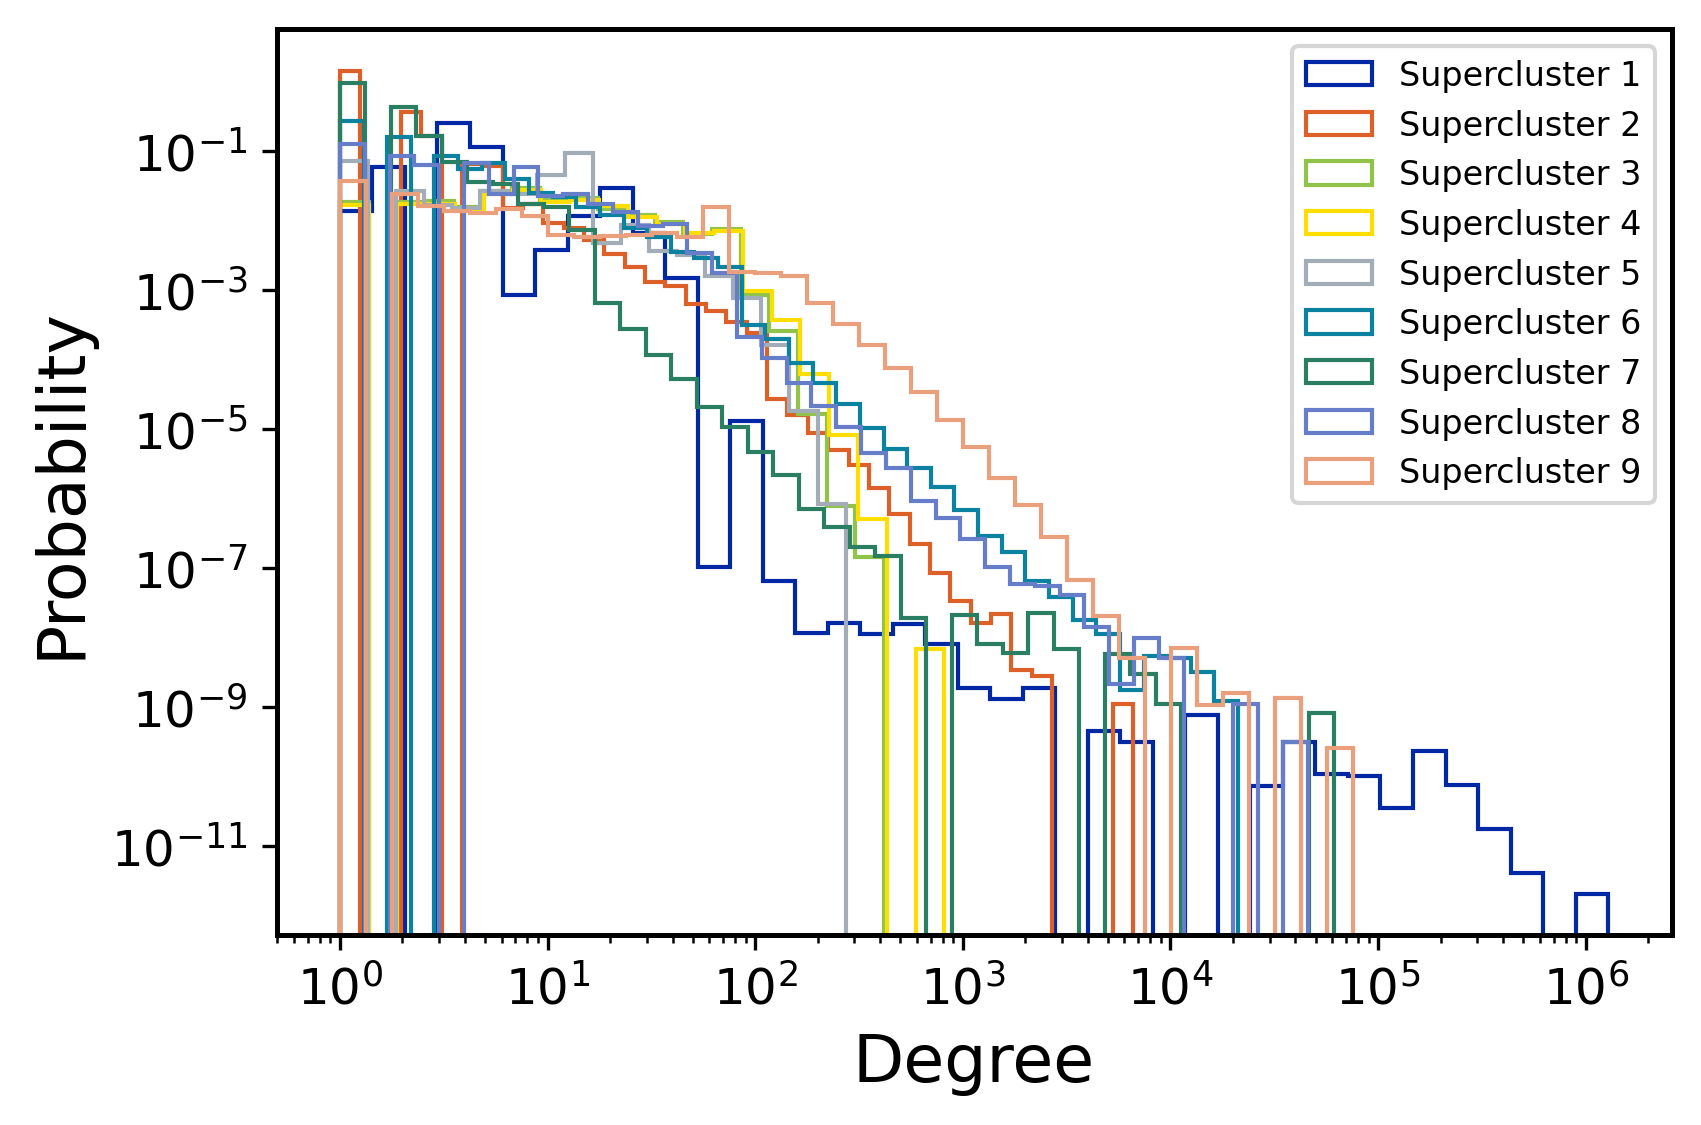

----------------------
Total elapsed time:  0:00:54.965973
----------------------
done!


In [32]:
# Plot degree distribution of 9 superclusters:

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


print('----------------------')
# Find NoWeight degrees of nodes:
noWeight_degree_seq_1 = sorted((d for n, d in tqdm(largest_CCs_1.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_1, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_1)),40))

noWeight_degree_seq_2 = sorted((d for n, d in tqdm(largest_CCs_2.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_2, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_2)),40))

noWeight_degree_seq_3 = sorted((d for n, d in tqdm(largest_CCs_3.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_3, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_3)),40))

noWeight_degree_seq_4 = sorted((d for n, d in tqdm(largest_CCs_4.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_4, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_4)),40))

noWeight_degree_seq_5 = sorted((d for n, d in tqdm(largest_CCs_5.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_5, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_5)),40))

noWeight_degree_seq_6 = sorted((d for n, d in tqdm(largest_CCs_6.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_6, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_6)),40))

noWeight_degree_seq_7 = sorted((d for n, d in tqdm(largest_CCs_7.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_7, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_7)),40))

noWeight_degree_seq_8 = sorted((d for n, d in tqdm(largest_CCs_8.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_8, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_8)),40))

noWeight_degree_seq_9 = sorted((d for n, d in tqdm(largest_CCs_9.degree())), reverse=True) # sort by NodeDegree_NoWeight
plt.hist(noWeight_degree_seq_9, density=True, histtype='step', bins = np.logspace(np.log10(1), np.log10(max(noWeight_degree_seq_9)),40))


plt.xlabel('Degree')
plt.ylabel('Probability')

plt.legend(['Supercluster 1', 'Supercluster 2', 'Supercluster 3', 'Supercluster 4', 'Supercluster 5', 'Supercluster 6', 'Supercluster 7', 'Supercluster 8', 'Supercluster 9'], fontsize="8", loc ="upper right")

plt.xscale("log" )
plt.yscale("log" )

plt.savefig('fig_deg_dist_super_clusters.pdf', bbox_inches='tight', facecolor='white')
plt.show()



##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')



Calculating best minimal value for power law fit
fit.power_law.alpha =  7.073310569506997
fit.power_law.sigma =  0.012079715681463887
fit.distribution_compare('power_law', 'exponential') =  (599680.9230113628, 2.6453316052486474e-37)
Calculating best minimal value for power law fit
fit.power_law.alpha =  3.654869944731794
fit.power_law.sigma =  0.1431409943174443
fit.distribution_compare('power_law', 'exponential') =  (78.29661542560251, 0.01039908942864474)
Calculating best minimal value for power law fit
fit.power_law.alpha =  7.571746675808779
fit.power_law.sigma =  0.17258252273163804
fit.distribution_compare('power_law', 'exponential') =  (2904.237871210668, 0.01597513443523822)
Calculating best minimal value for power law fit
fit.power_law.alpha =  7.373532883712869
fit.power_law.sigma =  0.15014222155155352
fit.distribution_compare('power_law', 'exponential') =  (2944.0873174547282, 0.03687691575986351)
Calculating best minimal value for power law fit
fit.power_law.alpha =  8.86

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


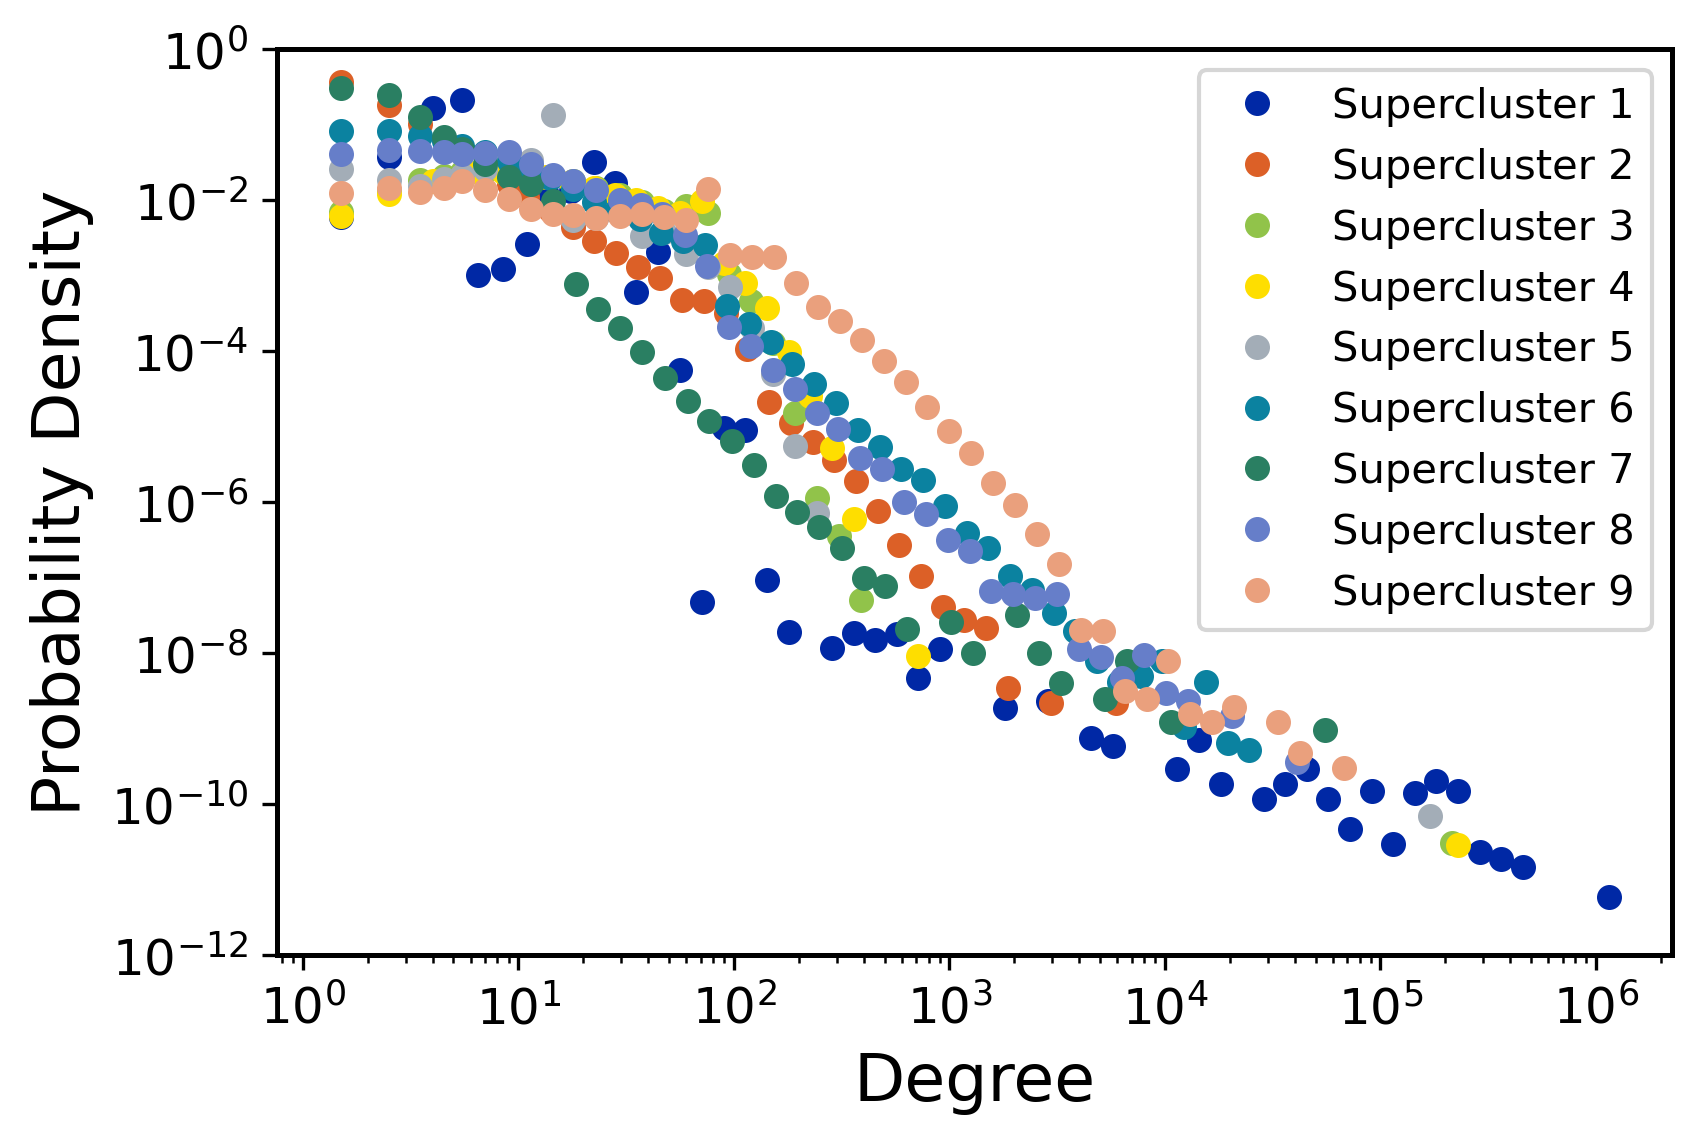

In [102]:
# power-law distributions (Superclusters degree distribution):


fit_1 = powerlaw.Fit(noWeight_degree_seq_1)
print('fit.power_law.alpha = ', fit_1.power_law.alpha)
print('fit.power_law.sigma = ', fit_1.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_1.distribution_compare('power_law', 'exponential'))

fit_2 = powerlaw.Fit(noWeight_degree_seq_2)
print('fit.power_law.alpha = ', fit_2.power_law.alpha)
print('fit.power_law.sigma = ', fit_2.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_2.distribution_compare('power_law', 'exponential'))

fit_3 = powerlaw.Fit(noWeight_degree_seq_3)
print('fit.power_law.alpha = ', fit_3.power_law.alpha)
print('fit.power_law.sigma = ', fit_3.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_3.distribution_compare('power_law', 'exponential'))

fit_4 = powerlaw.Fit(noWeight_degree_seq_4)
print('fit.power_law.alpha = ', fit_4.power_law.alpha)
print('fit.power_law.sigma = ', fit_4.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_4.distribution_compare('power_law', 'exponential'))

fit_5 = powerlaw.Fit(noWeight_degree_seq_5)
print('fit.power_law.alpha = ', fit_5.power_law.alpha)
print('fit.power_law.sigma = ', fit_5.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_5.distribution_compare('power_law', 'exponential'))

fit_6 = powerlaw.Fit(noWeight_degree_seq_6)
print('fit.power_law.alpha = ', fit_6.power_law.alpha)
print('fit.power_law.sigma = ', fit_6.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_6.distribution_compare('power_law', 'exponential'))

fit_7 = powerlaw.Fit(noWeight_degree_seq_7)
print('fit.power_law.alpha = ', fit_7.power_law.alpha)
print('fit.power_law.sigma = ', fit_7.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_7.distribution_compare('power_law', 'exponential'))

fit_8 = powerlaw.Fit(noWeight_degree_seq_8)
print('fit.power_law.alpha = ', fit_8.power_law.alpha)
print('fit.power_law.sigma = ', fit_8.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_8.distribution_compare('power_law', 'exponential'))

fit_9 = powerlaw.Fit(noWeight_degree_seq_9)
print('fit.power_law.alpha = ', fit_9.power_law.alpha)
print('fit.power_law.sigma = ', fit_9.power_law.sigma)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit_9.distribution_compare('power_law', 'exponential'))


###############################################################################################################################################
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')
plt.xlabel('Degree')
plt.ylabel('Probability Density')

plt.ylim(bottom=1e-12)

###############################################################################################################################################
markersize = 5

fig = fit_1.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_1.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_2.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_2.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_3.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_3.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_4.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_4.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_5.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_5.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_6.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_6.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_7.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_7.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_8.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_8.power_law.plot_pdf(linestyle = 'dashed', ax = fig)

fig = fit_9.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit_9.power_law.plot_pdf(linestyle = 'dashed', ax = fig)


plt.legend(['Supercluster 1', 'Supercluster 2', 'Supercluster 3', 'Supercluster 4', 'Supercluster 5', 'Supercluster 6', 'Supercluster 7', 'Supercluster 8', 'Supercluster 9'], fontsize="10", loc ="upper right")

plt.savefig('fig_deg_dist_superclusters.pdf', bbox_inches='tight', facecolor='white')



In [93]:
help(fit.power_law.plot_pdf)

Help on method plot_pdf in module powerlaw:

plot_pdf(data=None, ax=None, **kwargs) method of powerlaw.Power_Law instance
    Plots the probability density function (PDF) of the
    theoretical distribution for the values given in data within xmin and
    xmax, if present. Plots to a new figure or to axis ax if provided.
    
    Parameters
    ----------
    data : list or array, optional
        If not provided, attempts to use the data from the Fit object in
        which the Distribution object is contained.
    ax : matplotlib axis, optional
        The axis to which to plot. If None, a new figure is created.
    
    Returns
    -------
    ax : matplotlib axis
        The axis to which the plot was made.



Calculating best minimal value for power law fit
fit.power_law.alpha =  7.373532883712869
fit.power_law.sigma =  0.15014222155155352
fit.power_law.xmin =  185.0
fit.power_law.xmax =  None
fit.distribution_compare('power_law', 'exponential') =  (2944.0873174547282, 0.03687691575986351)


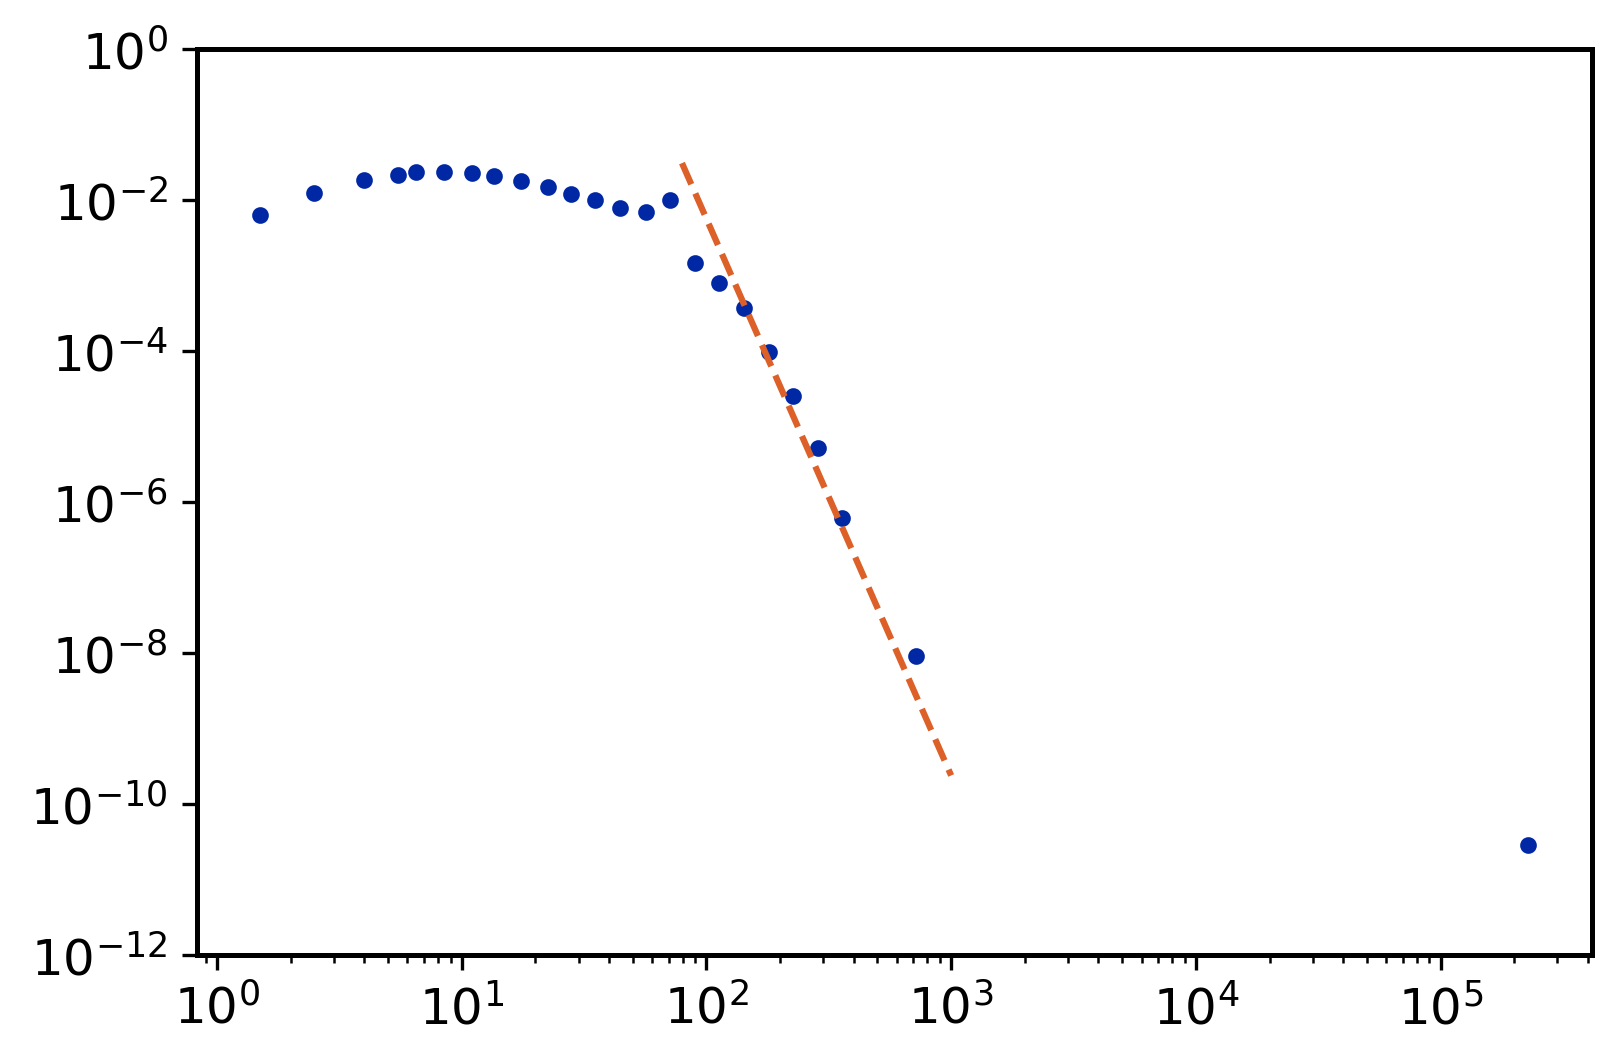

In [177]:
# Temporary:

fit = powerlaw.Fit(noWeight_degree_seq_4)
print('fit.power_law.alpha = ', fit.power_law.alpha)
print('fit.power_law.sigma = ', fit.power_law.sigma)
print('fit.power_law.xmin = ',  fit.power_law.xmin)
print('fit.power_law.xmax = ',  fit.power_law.xmax)
print('fit.distribution_compare(\'power_law\', \'exponential\') = ', fit.distribution_compare('power_law', 'exponential'))

#plt.xlim(left=10)
plt.ylim(bottom=1e-12)
markersize = 3

fig = fit.plot_pdf(linestyle = '', marker='o', original_data=True, markersize=markersize)
#fit.power_law.plot_pdf(linestyle = 'dashed', ax = fig)


def abline(plt, slope, intercept, x0, x1):
    """Plot a line from slope and intercept"""
    x_vals = np.logspace(x0, x1, num=100)
    y_vals = 10**(intercept) * (x_vals**slope)
    plt.plot(x_vals, y_vals, '--')


abline(plt, -fit.power_law.alpha, 1.25e+1, 1.9, 3)
plt.show()


In [ ]:
# Remove/Merge Nodes in "largest_cc_subgraph_COPY"  --> "r_remove=0" times,
#                                                   --> "r_merge =0" times:


print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)




largest_cc_subgraph_COPY = largest_cc_subgraph.copy()


print('----------------------')
print('Number of Nodes (largest_cc_subgraph_COPY) = ', largest_cc_subgraph_COPY.number_of_nodes())
print('Number of Edges (largest_cc_subgraph_COPY) = ', largest_cc_subgraph_COPY.number_of_edges())

print('----------------------')
# Find weighted degrees of nodes:
degree_sequence = sorted((d for n, d in tqdm(largest_cc_subgraph_COPY.degree(weight='weight'))), reverse=False)
print('Sum Weighted Degrees (largest_cc_subgraph_COPY) = ', sum(degree_sequence))
print('Max Weighted Degrees (largest_cc_subgraph_COPY) = ', max(degree_sequence))


print('----------------------')
# Find NoWeight degrees of nodes:
noWeight_degree_seq = sorted((d for n, d in tqdm(largest_cc_subgraph_COPY.degree())), reverse=True) # sort by NodeDegree_NoWeight
#[degree for node,degree in sorted(graph.degree(), key= lambda x: x[1], reverse=True)] 
plt.plot(noWeight_degree_seq)
plt.xlabel('node')
plt.ylabel('degree')
plt.xscale("log")
plt.yscale("log")
plt.show()
print('max = ', max(noWeight_degree_seq))
print('min = ', min(noWeight_degree_seq))
print('sum = ', sum(noWeight_degree_seq))
print('-----------------------')
print('x[0] = ', noWeight_degree_seq[0])
print('x[1] = ', noWeight_degree_seq[1])




# Remove Nodes with (Weighted_degree == 1):
print('======================')
print('Remove Nodes:')
r_remove = 0
for i in range(r_remove):
    nodes_to_be_removed = [node for node,degree in tqdm(dict(largest_cc_subgraph_COPY.degree(weight='weight')).items()) if(degree == 1)]
    print('len(nodes_to_be_removed) in step \"' + str(i+1) + '\" = ', len(nodes_to_be_removed))
    largest_cc_subgraph_COPY.remove_nodes_from(nodes_to_be_removed)




# Merge  Nodes with (NoWeight_degree == 1):
print('======================')
print('Merge Nodes:')
r_merge = 0
#This method takes ~30 hours for a graph with ~2 million nodes
for i in range(r_merge):
    nodes_to_be_merged = [node for node,degree in tqdm(dict(largest_cc_subgraph_COPY.degree()).items()) if(degree == 1)]
    print('len(nodes_to_be_merged) in step \"' + str(i+1) + '\" = ', len(nodes_to_be_merged))
    for node in tqdm(nodes_to_be_merged):
        neighbor_node = list(largest_cc_subgraph_COPY.neighbors(node))[0]
        merge_two_nodes(largest_cc_subgraph_COPY, node, neighbor_node)






print('======================')
print('Number of Nodes (largest_cc_subgraph_COPY) = ', largest_cc_subgraph_COPY.number_of_nodes())
print('Number of Edges (largest_cc_subgraph_COPY) = ', largest_cc_subgraph_COPY.number_of_edges())

print('----------------------')
# Find weighted degrees of nodes:
degree_sequence = sorted((d for n, d in tqdm(largest_cc_subgraph_COPY.degree(weight='weight'))), reverse=False)
print('Sum Weighted Degrees (largest_cc_subgraph_COPY) = ', sum(degree_sequence))
print('Max Weighted Degrees (largest_cc_subgraph_COPY) = ', max(degree_sequence))



##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time ( Remove/Merge Nodes in largest_cc_subgraph_COPY): ", et)

##########################################################################################
print('----------------------')
print('done!')


In [ ]:
# Model class "Label Propagation":

print('----------------------')


def find_weights(graph):
    edges = [(edge[0], edge[1]) for edge in nx.edges(graph)]
    edges = [(edge[1], edge[0]) for edge in nx.edges(graph)] + edges
    weights = {edge: float(graph.get_edge_data(edge[0], edge[1])['weight']) for edge in tqdm(edges)}
    return weights



#https://github.com/benedekrozemberczki/LabelPropagation
class LabelPropagator:
    """
    Label propagation class.
    """
    def __init__(self, graph, args):
        """
        Setting up the Label Propagator object.
        :param graph: NetworkX object.
        :param args: Arguments object.
        """

        self.seeding     = args['seed']
        self.rounds      = args['rounds']
        self.flag        = True

        self.graph       = graph
        
        #self.nodes       = [node for node in graph.nodes()]
        self.nodes       = [node for node,degree in sorted(graph.degree(), key= lambda x: x[1], reverse=False)] # sort by NodeDegree_NoWeight

        self.labels      = {node: node for node in self.nodes}
        self.label_count = len(set(self.labels.values()))

        
        self.weights = find_weights(self.graph)



    def make_a_pick(self, source, neighbors):
        """
        Choosing a neighbor from a propagation source node.
        :param source: Source node.
        :param neigbors: Neighboring nodes.
        """
        scores = {}
        for neighbor in neighbors:
            neighbor_label = self.labels[neighbor]
            if neighbor_label in scores.keys():
                scores[neighbor_label] = scores[neighbor_label] + self.weights[(neighbor, source)]
            else:
                scores[neighbor_label] = self.weights[(neighbor, source)]
        top = [key for key, val in scores.items() if val == max(scores.values())]
        return random.sample(top, 1)[0]



    def do_a_propagation(self):
        """
        Doing a propagation round.
        """
        for node in tqdm(self.nodes):
            neighbors = nx.neighbors(self.graph, node)
            pick = self.make_a_pick(node, neighbors)
            self.labels[node] = pick
        
        current_label_count = len(set(self.labels.values()))
        
        if self.label_count == current_label_count:
            self.flag = False
        else:
            self.label_count = current_label_count



    def do_a_series_of_propagations(self):
        """
        Doing propagations until convergence or reaching time budget.
        """
        index = 0
        print('----------------------')
        ct = datetime.datetime.now()
        print('label_count (Before Label Propagation) \t= ' + str(self.label_count), ' \t| Modularity  (Before Label Propagation) = ' + str(round(modularity(self.labels, self.graph, weight='weight'), 3)),
              ' \t| elapsed time (compute Modularity) \t= ', datetime.datetime.now() - ct)

        print('----------------------')
        while (index<self.rounds and self.flag):
            index = index + 1

            #print('Label propagation round: ' + str(index) + ' started!')
            ct = datetime.datetime.now()
            #if(index > 1):
            #    self.seeding = self.seeding*index
            #    random.seed(self.seeding)
            #    random.shuffle(self.nodes)
            self.do_a_propagation()
            print('elapsed time (execute do_a_propagation) = ', datetime.datetime.now() - ct)
            
            ct = datetime.datetime.now()
            print('label_count (round ' + str(index) + ') \t= ' + str(self.label_count), ' \t| Modularity  (round ' + str(index) + ') = ' + str(round(modularity(self.labels, self.graph, weight='weight'), 3)),
                  ' \t| elapsed time (compute Modularity) \t= ', datetime.datetime.now() - ct)


        print('----------------------')
        ct = datetime.datetime.now()
        print('label_count (After Label Propagation) \t= ' + str(self.label_count), ' \t| Modularity  (After Label Propagation) = ' + str(round(modularity(self.labels, self.graph, weight='weight'), 3)),
              ' \t| elapsed time (compute Modularity) \t= ', datetime.datetime.now() - ct)

        return self.labels



##########################################################################################
print('----------------------')
print('done!')



In [ ]:
# Perform "Label Propagation" on the largest_cc_subgraph_COPY (largest cluster):

print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


if __name__ == "__main__":
    """
    --rounds      INT    Number of iterations    Default is 8.
    --seed        INT    Initial seed            Default is 42.
    """
    args = {'rounds': 8, 'seed': 42}
    model = LabelPropagator(largest_cc_subgraph_COPY, args)
    NodeLabelsDict = model.do_a_series_of_propagations()
    #NodeLabelsDict = dict(sorted(NodeLabelsDict.items()))                          # sorted by key
    NodeLabelsDict = dict(sorted(NodeLabelsDict.items(), key=lambda item: item[1])) # sorted by value


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Store graph_weights into file): ", et)

##########################################################################################
print('----------------------')
print('done!')



In [ ]:
# Store/Load "NodeLabelsDict" into/from file:



# Store "NodeLabelsDict" into file:
'''
print('----------------------')
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
output_filename = BASE_ADDRESS + '/NodeLabelsDict_LabelPropagation__Heuristic1_LinkToALLAddressesInTX__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)

store_dict_to_file_INT (NodeLabelsDict, output_filename)

##########################################################################################
print('----------------------')
print('done!')
'''



# Load "NodeLabelsDict" from file:
'''
print('----------------------')
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
filename = BASE_ADDRESS + '/NodeLabelsDict_LabelPropagation__Heuristic1_LinkToALLAddressesInTX__Cardano_TXs_All__2023-01-09_191740.txt'

NodeLabelsDict = load_file_to_dict_INT(filename)

#dict(sorted(NodeLabelsDict.items()))                                           #sorted by key
NodeLabelsDict = dict(sorted(NodeLabelsDict.items(), key=lambda item: item[1])) # sorted by value

##########################################################################################
print('----------------------')
print('done!')
'''


In [ ]:
# Find number of members in each community:

print('----------------------')
ct = datetime.datetime.now()
print("start time: ", ct)

print('----------------------')
labelsArray = list(NodeLabelsDict.values())
sorted_labelsArray = np.sort(labelsArray, axis=None)  # sort the flattened array
print('labelsArray was sorted !')


num_of_labels = len(set(sorted_labelsArray))
print('number of labels = ', num_of_labels)


#Remap Labels:
new_label = 0
curr_label = sorted_labelsArray[0]
for i in range(0, len(sorted_labelsArray)):
    if(sorted_labelsArray[i] == curr_label):
        sorted_labelsArray[i] = new_label
    else:
        curr_label = sorted_labelsArray[i]
        new_label = new_label + 1
        sorted_labelsArray[i] = new_label
        


num_of_label_members = np.array([0] * num_of_labels)

for i in range(0, num_of_labels):
    x = BinarySearch_Find_start_end(sorted_labelsArray, i)
    num_of_label_members[i] = x[1] - x[0] + 1

    
print('----------------------')
print('number of nodes (to verify num_of_label_members) = ', sum(num_of_label_members))


print('----------------------')
et = datetime.datetime.now() - ct
print("elapsed time: ", et)


##########################################################################################

print('----------------------')
print('done!')


In [ ]:
# Plot result of community detection:

# sort descending
x = np.sort(num_of_label_members)[::-1]

plt.plot(x)

plt.xlabel('community (= label)')
plt.ylabel('nodes (= addresses) in community')

# "linear", "log", "symlog", "logit"
plt.xscale("log")
plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)

plt.show()

print('max = ', max(x))
print('min = ', min(x))
print('sum = ', sum(x))
print('-----------------------')
print('x[0] = ', x[0])
print('x[1] = ', x[1])



In [ ]:
plt.hist(num_of_label_members, density=True, bins = np.logspace(np.log10(1), np.log10(max(num_of_label_members)),50))
plt.xscale("log" )
plt.yscale("log" )

plt.show()